In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
real_estate_dataset = pd.read_csv("/content/Real estate.csv")


In [ ]:
print(real_estate_dataset)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [ ]:
real_estate_dataset.shape

(414, 8)

In [ ]:
real_estate_dataset.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
real_estate_dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


understanding the corelation between various features in the dataset

1 positive corelation 
2 negative corelation

In [ ]:
correlation = real_estate_dataset.corr()

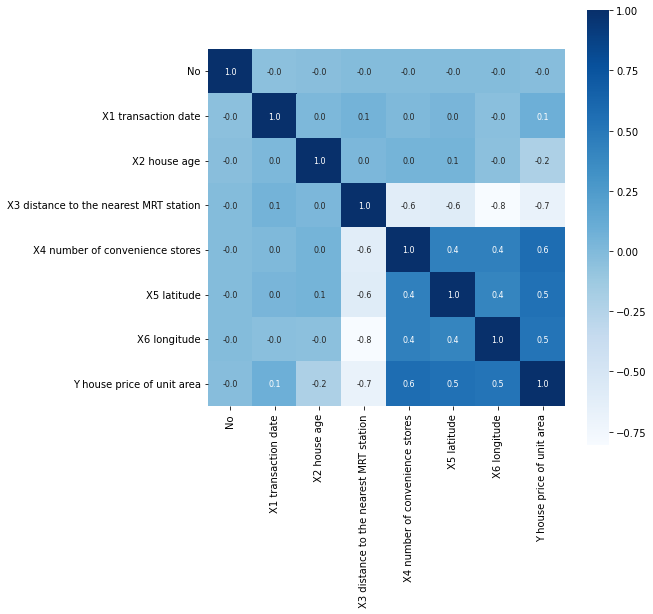

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
m = real_estate_dataset.drop(['Y house price of unit area'],axis=1)
n = m.drop(["X1 transaction date"], axis = 1)
x = n.drop(["No"],axis=1)
y = real_estate_dataset['Y house price of unit area']

In [ ]:
print(x,y)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  
0                                 10     24.98298     121.54024  
1                                  9     24.98034     121.53951  
2                                  5     24.98746     121.54391  
3  

Spilliting the data into training data and test data

In [ ]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(414, 5) (331, 5) (83, 5)


model training

XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(x_train,y_train)

[04:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

evaluation

prediction on training data

In [ ]:
training_data_prediction = model.predict(x_train)

In [ ]:
print(training_data_prediction)

[41.201878  38.39382   36.415066  37.84979   38.397686  35.812744
 16.973469  48.784676  51.832546  32.660778  25.024721  28.306185
 30.364964  48.05037   68.610275  16.749184  42.775433  38.39382
 67.00384   17.236444  17.638607  42.15806   46.66619   50.293636
 48.890366  29.210588  36.85624   45.497814  35.52799   39.082428
 38.566025  48.784676  38.87153   49.582058  61.22832   42.478363
 29.761961  49.158062  35.591846  39.12596   40.1961    22.889244
 40.64863   48.679714  17.638607  50.503902  41.0861    50.18855
 41.19698   16.854273  38.051567  24.563814  46.914925  31.709307
 40.215405  57.308304  37.829597  56.008698  26.521168  56.04104
 57.153576  17.20986   49.522434  30.079031  47.821198  36.319283
 50.18855   25.176487  39.12596   28.324472  16.86838   16.749184
 28.081675  26.763966  15.562679  46.28916   57.308304  46.731358
 25.443567  42.368534  34.77176   53.97698   56.77765   57.308304
 54.379993  27.64128   28.483625  48.679714  50.265434  25.844368
 48.82186   4

In [ ]:
# r squared error
from sklearn import metrics
score_1 = metrics.r2_score(y_train,training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print("r squared error: ", score_1)
print("mean absolute error: ",score_2)

r squared error:  0.9104981850923254
mean absolute error:  3.00295205418797


visualizing the actual prices and predicted prices

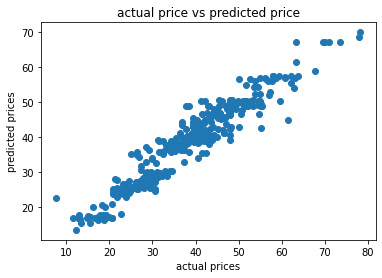

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()

prediction on test data

In [ ]:
test_data_prediction = model.predict(x_test)

In [ ]:
print(test_data_prediction)

[47.033405 43.13516  25.443567 36.258717 27.508226 33.180702 40.176285
 35.812744 39.951557 57.308304 48.784676 25.024721 39.368275 47.766068
 49.28744  29.947525 39.248558 28.258413 15.562679 21.94413  44.084126
 15.403787 34.996067 37.19468  26.880262 24.969475 25.163477 56.49759
 21.903004 41.845352 48.75644  39.10566  28.04801  50.483017 26.424635
 25.443567 46.66619  27.740822 27.308573 21.903004 24.818834 41.268543
 46.28916  36.079777 31.044231 45.727177 48.59859  21.903004 42.30703
 38.479977 26.081398 41.11509  50.16632  40.86997  48.784676 50.18855
 46.029903 16.678894 40.07928  42.679424 15.562679 49.38786  24.701984
 44.152615 37.732555 40.419777 54.033745 21.09408  16.310722 16.297913
 27.268898 29.761961 16.854273 25.443567 15.562679 24.684093 38.589058
 52.17019  40.419777 28.307959 17.638607 37.901974 49.158062]


In [ ]:
# r squared error
score_3 = metrics.r2_score(y_test,test_data_prediction)

# mean absolute error
score_4 = metrics.mean_absolute_error(y_test,test_data_prediction)

print("r squared error: ", score_3)
print("mean absolute error: ",score_4)

r squared error:  0.5649669084514715
mean absolute error:  4.766286594896431


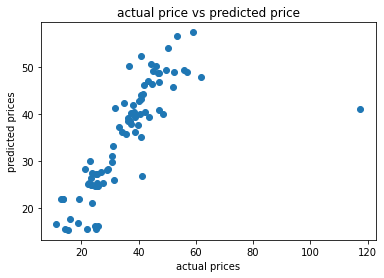

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual price vs predicted price")
plt.show()